<center><img src="img/skillfactorylogo.png"></center>

<h1><center>Курс "Практический Machine Learning"</center></h1>
<h3><center>Шестаков Андрей</center></h3>
<hr>
<h2><center>Логистическая регрессия</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

from ipywidgets import interact, IntSlider, FloatSlider

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/512px-Svm_separating_hyperplanes_%28SVG%29.svg.png'></center>

Нам надо найти уравнение прямой (гиперплоскости), которая бы могла разделить два класса ($H_2$ и $H_3$ подходят). В данном случае, уравнение прямой задаётся как: $$g(x) = w_0 + w_1x_1 + w_2x_2 = \langle w, x \rangle =  w^\top x$$

* Если $g(x^*) > 0$, то $y^* = +1 = \text{'черный'}$
* Если $g(x^*) < 0$, то $y^* = -1 = \text{'белый'}$
* Если $g(x^*) = 0$, то мы находимся на линии
* т.е. решающее правило: $y^* = sign(g(x^*))$

In [2]:
def demo_sigmoid():
    def sigmoid(z):
        return 1./(1. + np.exp(-z))

    z = np.linspace(-10, 10, 100)

    y = sigmoid(z)
    plt.plot(z, y)
    plt.xlabel('$z$')
    plt.ylabel('$\sigma(z)$')
    
    plt.show()

Перед тем как мы пойдем дальше, рассмотрим функцию $$\sigma(z) = \frac{1}{1 + exp{(-z)}},$$она называется **сигмойда**. 

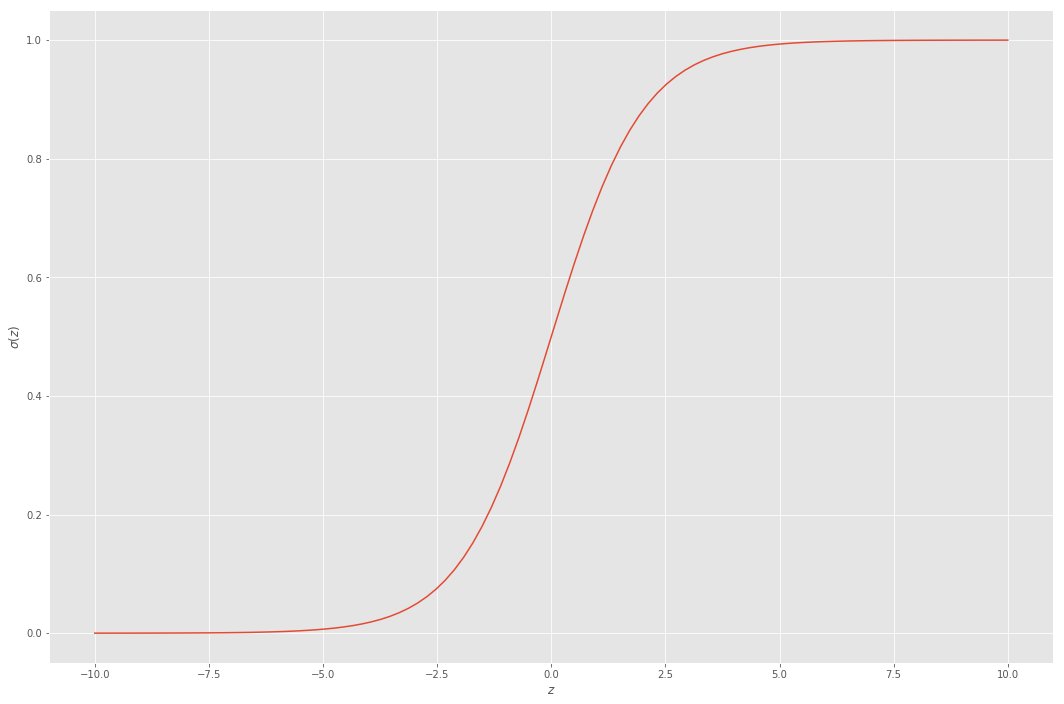

In [3]:
demo_sigmoid()

<center><img src='img/prob.png'></center>

#### Постановка задачи
Будем требовать, чтобы алгоритм возвращал вероятность класса $y=+1$:
$$h(x,w) = p(y=+1|x,w) = \sigma(g(x))$$

Выпишем функцию правдоподобия
$$ \mathcal{L}(w) = \prod_i^n h(x^{(i)},w)^{[y^{(i)} = +1]} (1 - h(x^{(i)},w))^{[y^{(i)} = -1]} \rightarrow \max_w$$
$$ -\log{\mathcal{L}(w)} = - \sum_i^n [y^{(i)} = +1]\cdot\log{(h(x^{(i)},w))} + {[y^{(i)} = -1]}\cdot\log{(1-h(x^{(i)},w))} \rightarrow \min_w$$
$$L(w) = \log{\mathcal{L}(w)} \rightarrow \min_w $$

In [48]:
## Еще раз про logloss

h = np.linspace(0, 1, 20) # вероятность класса +1, которую дает классификатор
L1 = -np.log(h) # полагаем, то объект относится к классу +1. Тогда это значение его ошибки logloss
L2 = -np.log(1-h) # полагаем, то объект относится к классу -1. Тогда это значение его ошибки logloss


/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


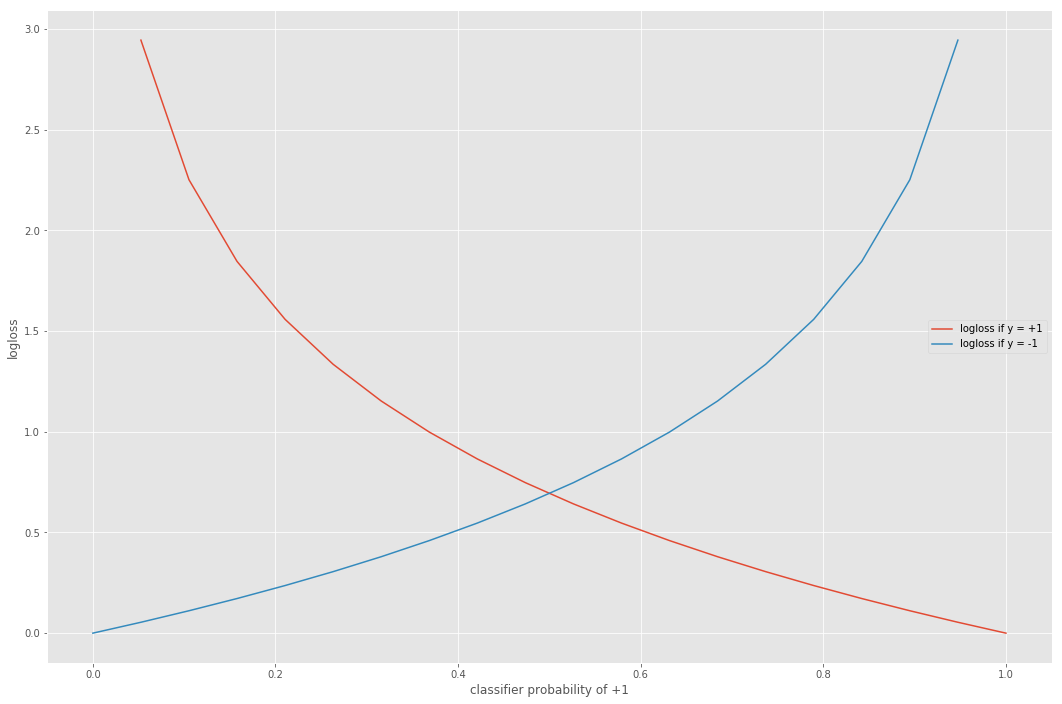

In [50]:
plt.plot(h, L1, label='logloss if y = +1')
plt.plot(h, L2, label='logloss if y = -1')
plt.ylabel('logloss')
plt.xlabel('classifier probability of +1')

plt.legend()

Далее игрушечный пример с sklearn

In [4]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) + [2, 2],
          np.random.randn(20, 2) + [-2, -2]]
y = [-1] * 20 + [1] * 20

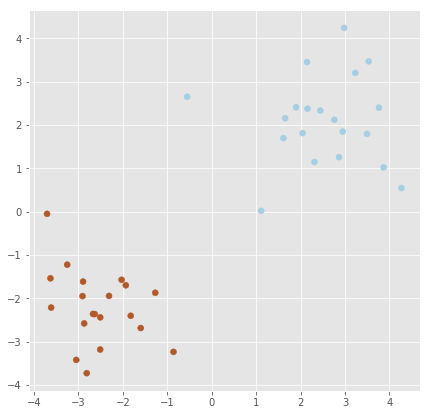

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)

In [6]:
from sklearn.linear_model import LogisticRegression

Обучите логистическую регрессию на этих данных и нарисуйте разделяющую гиперплоскость

In [7]:
model = LogisticRegression(C=1.0, 
                           fit_intercept=True, 
                           penalty='l2')
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
print('w_0 = %f' % model.intercept_)
print('w_1, w_2 = ', model.coef_)

w_0 = -0.183954
('w_1, w_2 = ', array([[-1.06097157, -1.00171289]]))


In [10]:
# Нарисуем эту гиперплоскость
w_0 = model.intercept_[0]
w_1 = model.coef_[0][0]
w_2 = model.coef_[0][1]

x_1 = np.linspace(-4, 4, 10)
x_2 = - (w_0 + w_1*x_1)/w_2

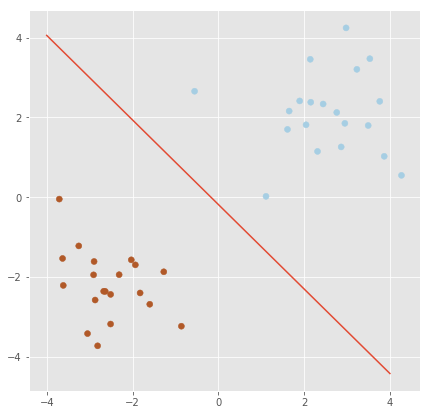

In [11]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)
plt.plot(x_1, x_2)

In [12]:
y_hat = model.predict(X)
y_hat[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [13]:
y_hat_proba = model.predict_proba(X)
y_hat_proba[:10, :]

array([[  9.98616528e-01,   1.38347180e-03],
       [  9.99496019e-01,   5.03981209e-04],
       [  9.95091160e-01,   4.90883960e-03],
       [  9.94323473e-01,   5.67652674e-03],
       [  9.90157090e-01,   9.84290974e-03],
       [  9.97319087e-01,   2.68091305e-03],
       [  9.94720579e-01,   5.27942062e-03],
       [  9.94026880e-01,   5.97312006e-03],
       [  9.96628393e-01,   3.37160720e-03],
       [  9.77815343e-01,   2.21846572e-02]])

In [14]:
dec_func = model.decision_function(X)
dec_func[:10]

array([-6.58177471, -7.59246747, -5.31179677, -5.16572302, -4.61111223,
       -5.91891334, -5.23864551, -5.11449484, -5.68898843, -3.78591991])

### Как сделать нелинейную границу?

Рассмотрим набор данных, который в простонародье называют "Бублик".

In [15]:
from sklearn.datasets import make_circles

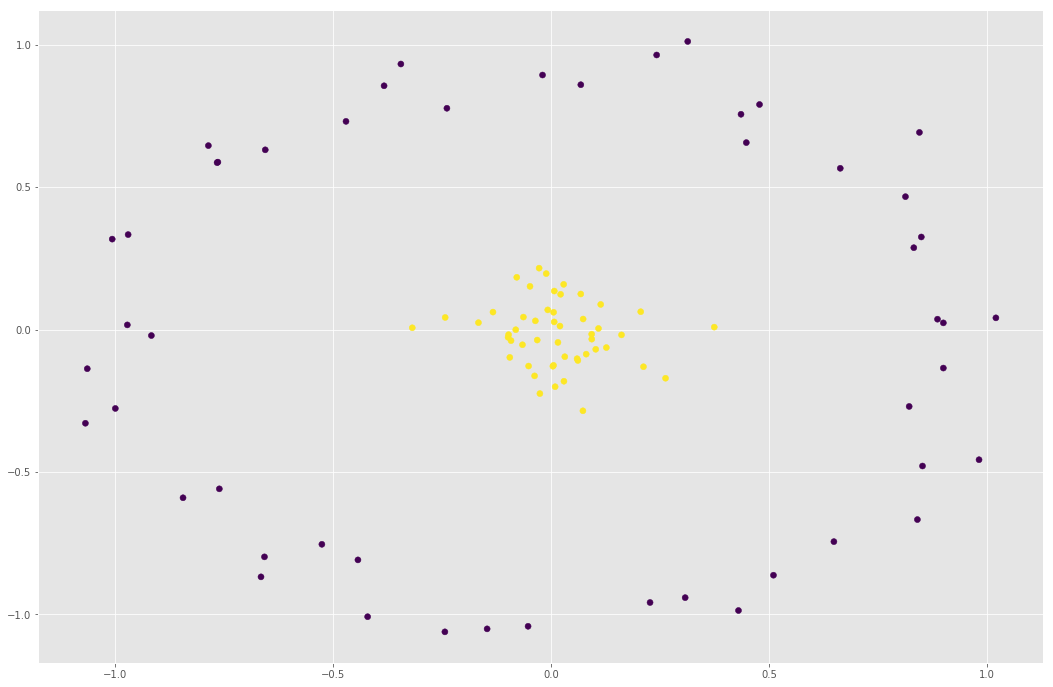

In [16]:
X, y = make_circles(n_samples=100, shuffle=True,
                    noise = 0.1,
                    factor=0.1)

plt.scatter(X[:, 0],
            X[:, 1],
            c=y)

Очевидно, что классы нельзя разделить линией. Но можно сделать это окружностью! </br>
Т.е. разделяющся линия теперь будет задаваться не уравнением прямой $g(x) = w_0 + w_1x_1 + w_2x_2$, а уравнением окружности $c(x) = (x_1 - a)^2 + (x_2 - b)^2 - R^2$. 

Выполните преобразование матрицы X, чтобы в ней были столбцы для $x_1$, $x^2_1$, $x_2$ + $x^2_2$ и обучите логистическую регрессию

In [17]:
X_new = np.c_[X[:,0], X[:,1], X[:,0]**2 + X[:,1]**2]
model = LogisticRegression(C=100000, 
                           fit_intercept=True)
model.fit(X_new, y)

LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [18]:
# Посчитаем количество ошибок
y_hat = model.predict(X_new)
(y != y_hat).sum()

0

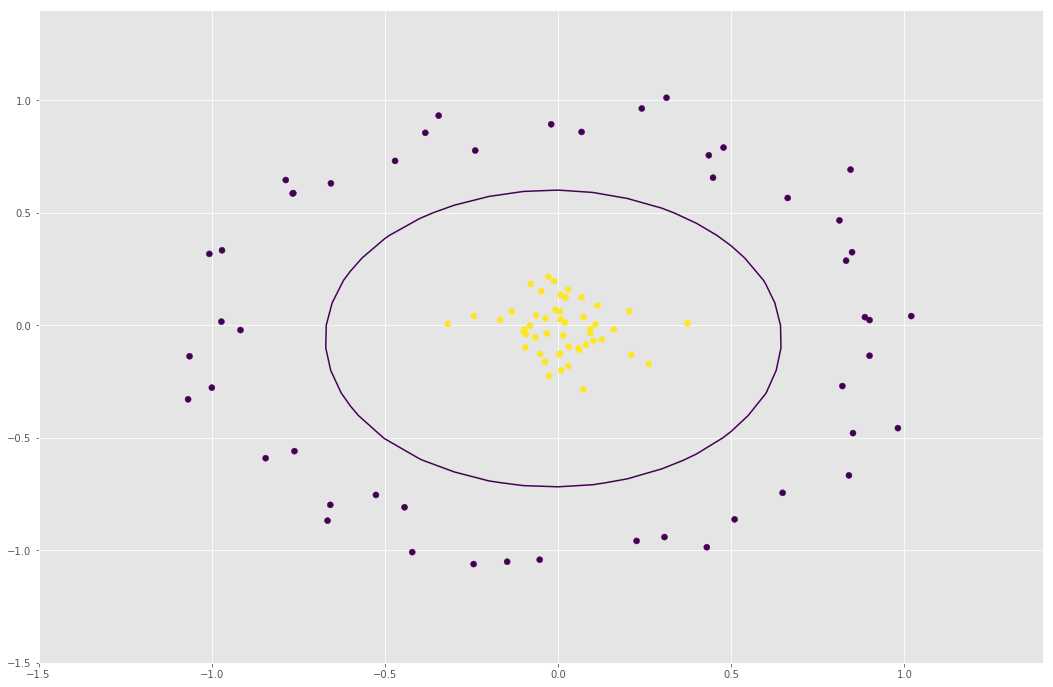

In [19]:
# Нарисуем полученную окружность

x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.1),
                       np.arange(-1.5, 1.5, 0.1))
xx0, xx1 = x0.ravel(), x1.ravel()

X_grid = np.c_[xx0, xx1, xx0**2 + xx1**2]

y_hat = model.decision_function(X_grid)
y_hat = y_hat.reshape(x0.shape)

plt.contour(x0, x1, y_hat, levels=[0])
plt.scatter(X[:,0], 
            X[:, 1], 
            c=y)

## Анализ тональности

Загрузите текстовые данные [отсюда](https://archive.ics.uci.edu/ml/machine-learning-databases/00331/). Архив должен содержать 3 файла с положительными и отрицательными отзывами с ресурсов
* imdb.com
* amazon.com
* yelp.com

Формат файла следующий:
<отзыв>\t<метка>\n


### Задача
1. Загрузите тексты и метки классов в разные переменные
2. Выберите меру качества классификации
3. Обучите логистическую (без подбора гиперпараметров). Тексты представляются в виде мешка слов
4. Выведите наиболее значимые слова из текста

In [20]:
df = pd.read_csv('data/amazon_cells_labelled.txt', sep='\t', header=None, names=['text', 'label'])

In [21]:
df.head()

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [24]:
model = Pipeline([
    ('vect', CountVectorizer(min_df=4, max_df=0.95, stop_words='english', ngram_range=(1,1))),
    ('clf', LogisticRegression())
])

In [25]:
texts = df.loc[:, 'text'].values
y = df.loc[:, 'label'].values

In [26]:
model.fit(texts, y)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.95, max_features=None, min_df=4,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
    ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [30]:
coefs = model.named_steps['clf'].coef_[0]
words = model.named_steps['vect'].get_feature_names()

In [31]:
weights = pd.Series(index=words, data=coefs)

In [33]:
weights[:10]

10            0.752010
able          0.126512
absolutely    0.743917
actually      0.269475
ago           0.197490
amazon        0.173003
arrived       0.084820
audio        -0.318970
away         -0.088668
awesome       1.185547
dtype: float64

In [34]:
weights.sort_values()

poor             -1.821987
bad              -1.536049
terrible         -1.511237
worst            -1.420432
old              -1.268675
disappointed     -1.266014
difficult        -1.204443
picture          -1.179711
horrible         -1.149864
buying           -1.107306
disappointing    -1.083567
waste            -1.081926
broke            -1.078211
plug             -1.065591
money            -1.039308
unit             -1.038663
stay             -1.038460
hear             -1.033899
useless          -1.013376
didn             -1.012895
doesn            -0.992013
junk             -0.980085
return           -0.967030
work             -0.929613
headphones       -0.902460
disappointment   -0.883399
mistake          -0.849012
piece            -0.837505
unreliable       -0.835222
unfortunately    -0.833627
                    ...   
original          0.845690
pretty            0.855830
clear             0.873619
fine              0.911847
cool              0.948339
fits              0.977235
s

# Регуляризация

В случае с логистичесткой регресии, сложность модели выражается в значениях весов $w_j$ при признаках. Больший вес означает большее влияние признака на результат. В таком случае, давайте добавил штрафное слагаемое в функцию оптимизации для логистической регресии. Самый распространенные из них это:

Стало (Ridge Regularization)
$$ L(\beta_0,\beta_1,\dots) = \mathcal{L}(w) + \frac{1}{C}\sum_{j=1}^{m}w_j^2$$
или (Lasso Regularization)
$$ L(\beta_0,\beta_1,\dots) = \mathcal{L}(w)+ \frac{1}{C}\sum_{j=1}^{m}|w_j|$$

$C$ - называется гиперпараметром регуляризации и он задается вручную. Выбирается он с помощью кросс-валидации. Чем больше $С$ - тем меньше влияние регуляризации.

Lasso regression называется так, потому что она осуществляет "отлов" признаков - т.е. незначимые признаки будут иметь нулевые веса в модели, в то время как в Ridge regression - веса будут постепенно падать у всех признаков.

<img src='http://webdancer.is-programmer.com/user_files/webdancer/Image/lasso.png'>

Однако использование регуляризации превращает логистическую регрессию в черный ящик - мы предоставляем оптимизационному методу решать за нас, какие признаки важны для модели.

Давайте сравним работу регуляризаторов. 

1. Разбейте данные на обучающую и контрольную выборки.
1. Для $C$ из набора np.logspace(-3, 3, 10) обучите LogisctigRegression c Lasso регуляризацией (`penalty='l1'`). На каждой итерации оцените качество (ROC-AUC) на контрольной выборке и запомните полученные коэффициенты модели
1. На одном графике выведите значение качества в зависимости от параметра `C` 
1. На другом графике для каждого признака выведите изменение коэффициента в модели в зависимости от параметра `C`
1. Для оптимальной на ваш взгляд настройки модели выведите 5 наиболие "важных" признаков и их коэффициенты
1. Проделайте тоже самое для Ridge регуляризации (`penalty='l2'`)

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
df_churn = pd.read_csv('data/churn.csv')

In [37]:
def preproc(df_init):
    df_preproc = df_init.copy()
    
    # Удалили признаки
    df_preproc = df_preproc.drop(['State', 'Area Code', 'Phone'], axis=1)
    
    # Замена категориальных признаков
    df_preproc.loc[:,  ["Int'l Plan", 'VMail Plan']] = \
    df_preproc.loc[:,  ["Int'l Plan", 'VMail Plan']].replace({'no': 0, 'yes': 1})
    
    df_preproc.loc[:,  'Churn?'] = df_preproc.loc[:,  'Churn?'].replace({'False.': 0,
                                                                         'True.': 1})
    return df_preproc

In [38]:
df_preproc = df_churn.pipe(preproc)

In [39]:
X, y = df_preproc.iloc[:, :-1].values, df_preproc.iloc[:, -1].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [41]:
model = LogisticRegression(penalty='l1', C=1, fit_intercept=True)
#... После fit()

# # Коэффициенты w_1...w_d
# model.coef_

# # Коэффициент при свободном члене w_0
# model.intercept_

# # Предсказание
# model.predict(X_test)
# model.predict_proba(X_test)
# model.decision_function(X_test)


In [43]:
coefs = np.empty((X.shape[1],))
scores = []

c_range = np.logspace(-3, 3, 10)

for C in c_range:
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(penalty='l2', fit_intercept=True, C=C))
    ])

    model.fit(X_train, y_train)
    
    
    coefs = np.c_[coefs, model.named_steps['clf'].coef_[0]]
    s = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    scores.append(s)
    

Text(0,0.5,u'weights')

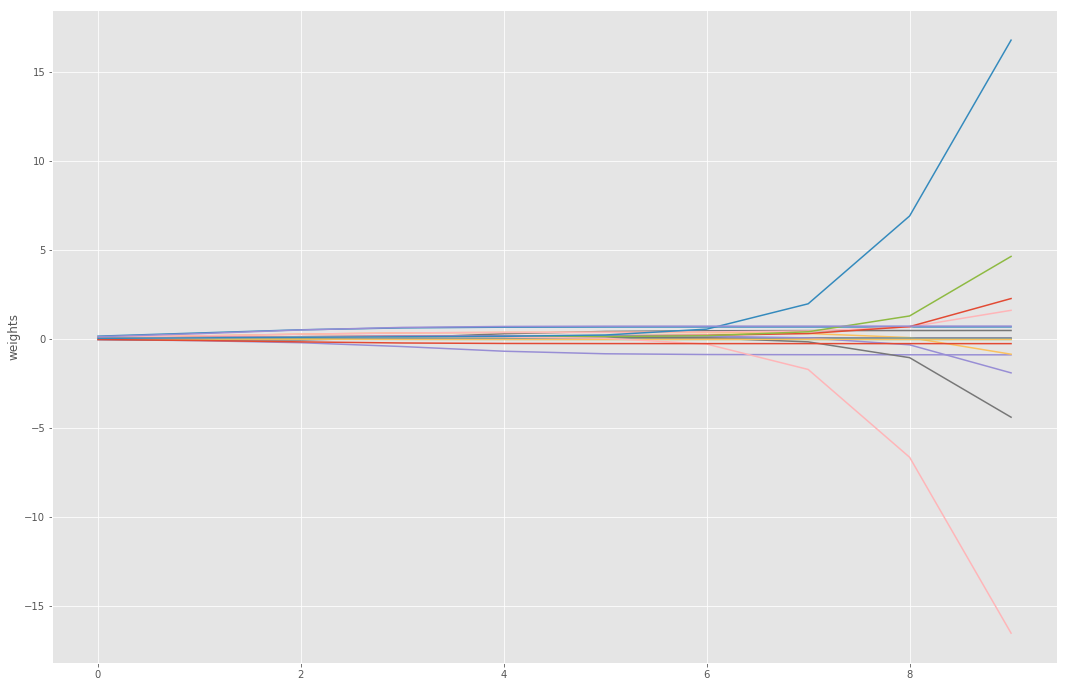

In [44]:
plt.plot(coefs[:, 1:].T)
plt.ylabel('weights')

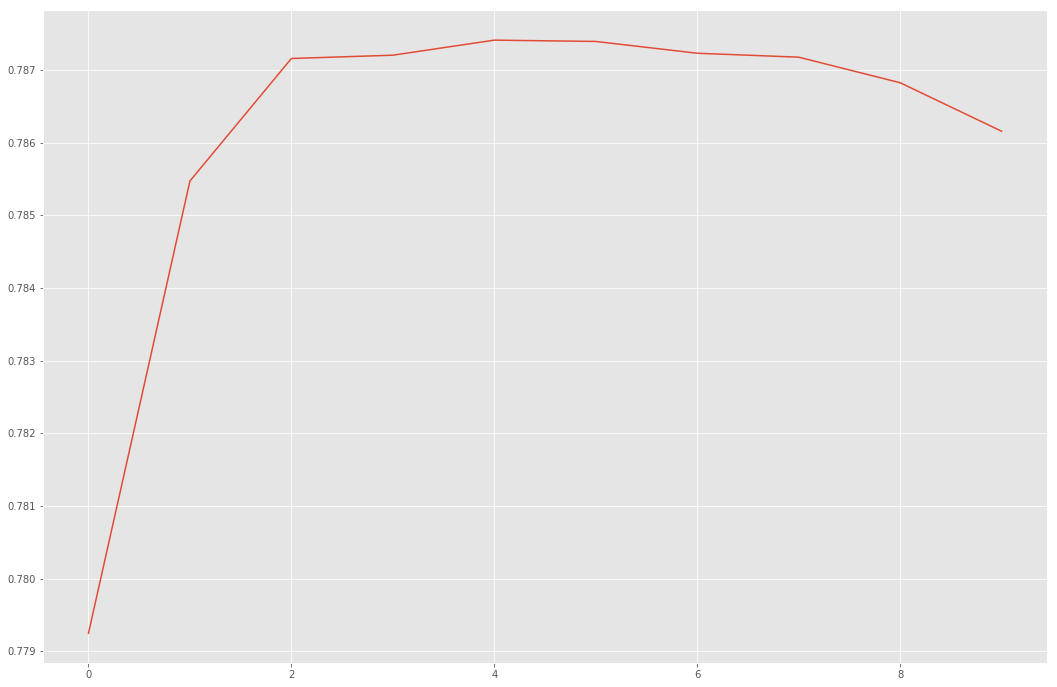

In [45]:
plt.plot(scores)